# TSA PROJECT



# Title: Time Series Analysis of Product Sales Across Multiple Stores

ARBAOUI KHEDIDJA G1

# 1.ABSTRACT

This project aims to analyze and forecast sales data across multiple stores using time series modeling techniques. The dataset, obtained from Kaggle, consists of simulated sales records from 2010 to 2019, with features including:#### date, store ID, product ID, and units sold.



date, store ID, product ID, and units sold.

The objective is to develop a forecasting model that can predict future sales trends based on historical data. The analysis will involve data preprocessing, model specification, diagnostic checks, and forecasting using appropriate time series methods. The findings will help in understanding seasonality patterns, long-term trends, and potential forecasting accuracy. This study provides insights into sales fluctuations and demonstrates the effectiveness of different forecasting models for real-world applications.

[Dataset on Kaggle]([Dataset on Kaggle](https://www.kaggle.com/your-dataset-link)
)


# 2.INTRODUCTION

Time series analysis plays a crucial role in understanding historical trends and making data-driven predictions for the future. In this project, we analyze a synthetic sales dataset that spans 10 years (2010-2019) and contains information on product sales across multiple stores. The primary goal of this study is to develop a forecasting model to predict future sales based on historical patterns.

The dataset consists of the following key variables:

Date – The time-based feature that indicates when each transaction occurred.

Store ID – Identifies different store locations, allowing us to examine sales trends across multiple stores.

Product ID – Represents unique products, enabling us to track individual product sales over time.

Units Sold – The target variable, showing the number of items sold per store and product.

This dataset is well-suited for time series forecasting because it exhibits key characteristics such as seasonality, trends, and potential noise. Additionally, sales data is influenced by various external factors, including holidays, economic conditions, and promotional events, making this a realistic forecasting challenge.

By applying statistical modeling and machine learning techniques, we aim to:

Explore and visualize time series trends, seasonality, and patterns.

Identify the best model(s) for forecasting future sales.

Evaluate the performance of different forecasting methods using appropriate metrics

This project is significant because accurate sales forecasting can help businesses optimize inventory management, enhance marketing strategies, and improve decision-making processes.

# 3.DATA EXPLORATION

In [ ]:

# read data
library(dplyr)
library(readr)
mydata <- read_csv("train.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 230090 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (3): store, product, number_sold
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(mydata)

Date,store,product,number_sold
<date>,<dbl>,<dbl>,<dbl>
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808
2010-01-06,0,0,812


#step 1 :Keep Only the Date and Target Variable

In [ ]:
# Select only Date and Target Variable
mydata <- mydata %>% select(Date, number_sold)
head(mydata)


Date,number_sold
<date>,<dbl>
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808
2010-01-06,812


We have successfully filtered the dataset to keep only the date and sales data (target variable).
This step is crucial because it allows us to focus on time-dependent trends without other unrelated information.

#Step 2: Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
sum(is.na(mydata))

[1] 0

In [ ]:
summary(mydata)


      Date             number_sold    
 Min.   :2010-01-01   Min.   : 238.0  
 1st Qu.:2012-04-01   1st Qu.: 722.0  
 Median :2014-07-02   Median : 835.0  
 Mean   :2014-07-02   Mean   : 780.9  
 3rd Qu.:2016-10-01   3rd Qu.: 914.0  
 Max.   :2018-12-31   Max.   :1205.0  

##1. ploting the data


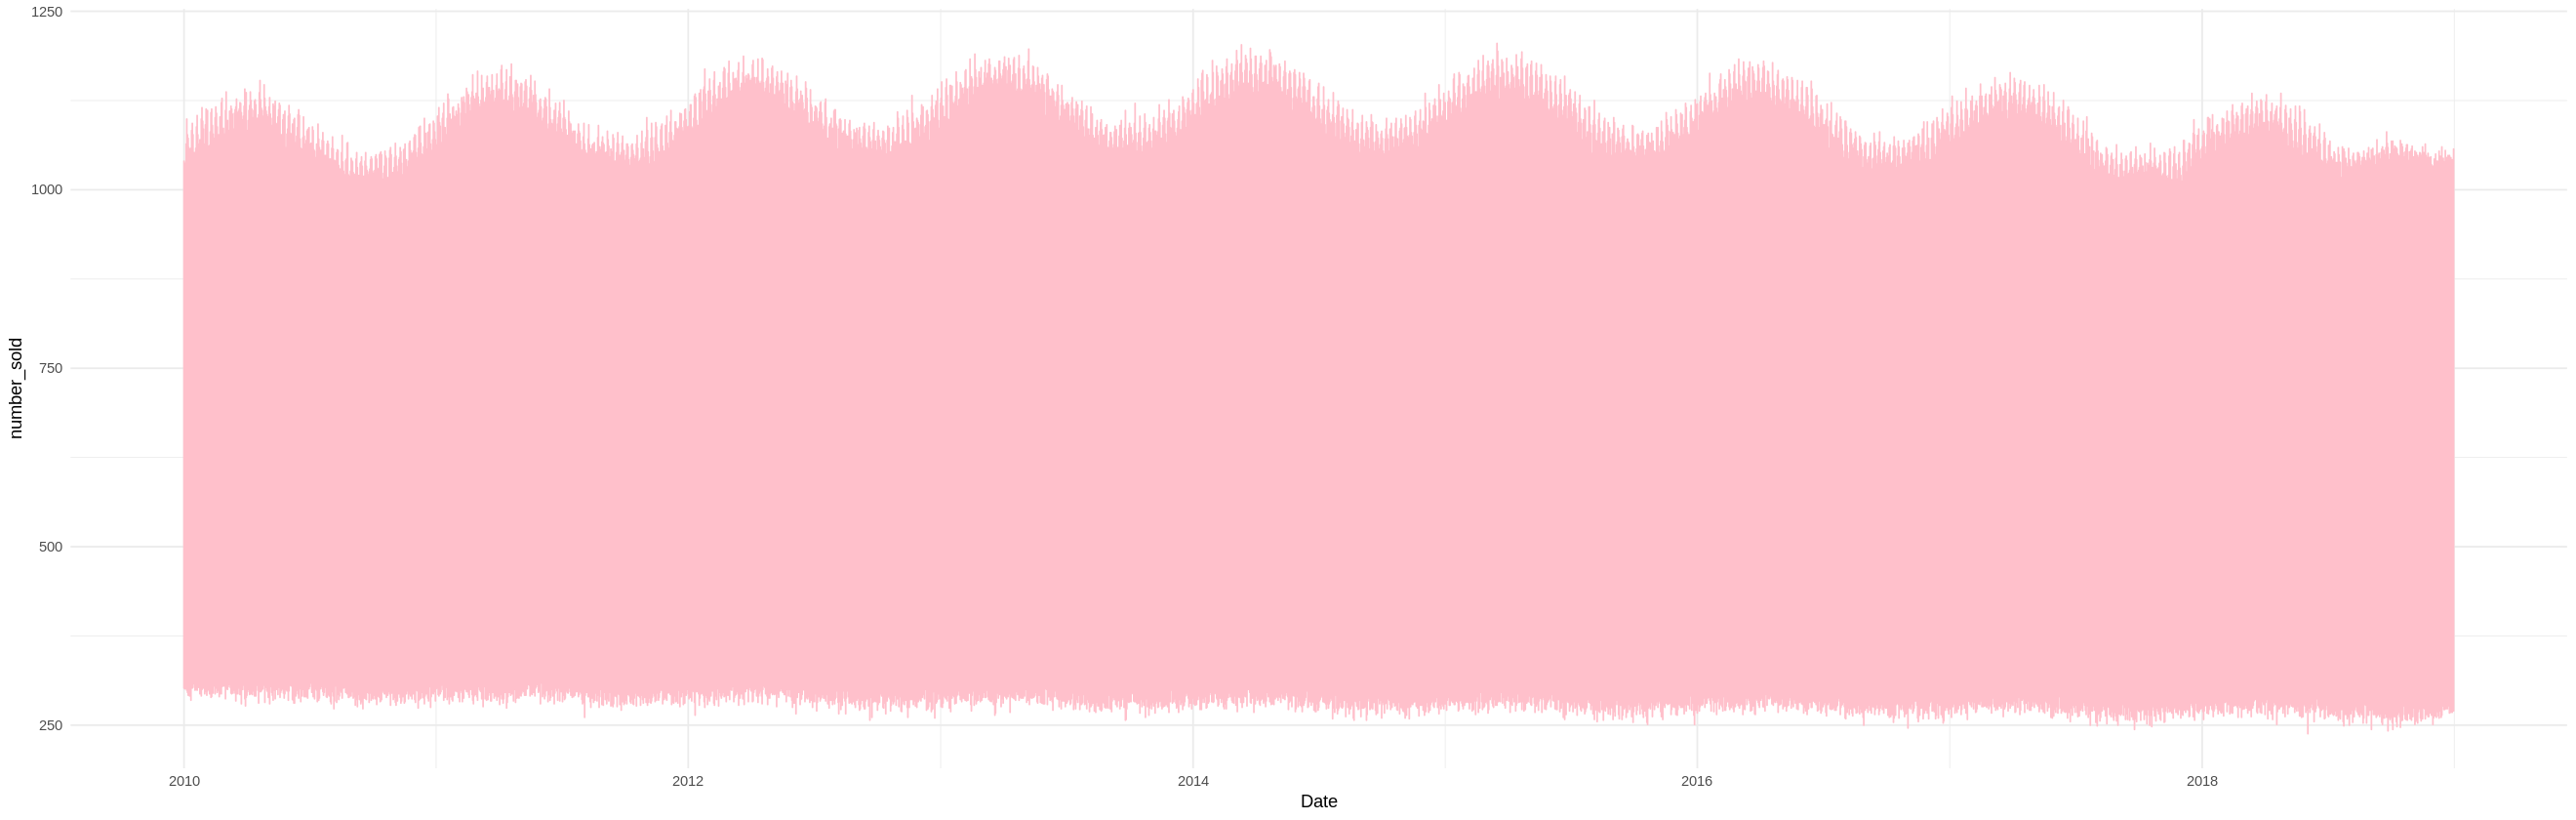

In [ ]:
mydata$Date <- as.Date(mydata$Date)
library(ggplot2)


ploteddata <- mydata %>% ggplot() + geom_line(aes(x=Date, y=number_sold), col="pink") + theme_minimal()
options(repr.plot.width = 22, repr.plot.height = 7)

print(ploteddata)

Since the data is recorded on a daily basis, the plot appears too dense, making it difficult to observe clear patterns and trends. The high frequency of data points results in overlapping values, reducing interpretability. To improve visibility and better analyze long-term trends, we may consider aggregating the data at a higher level, such as by month or week.

##Monthly data


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


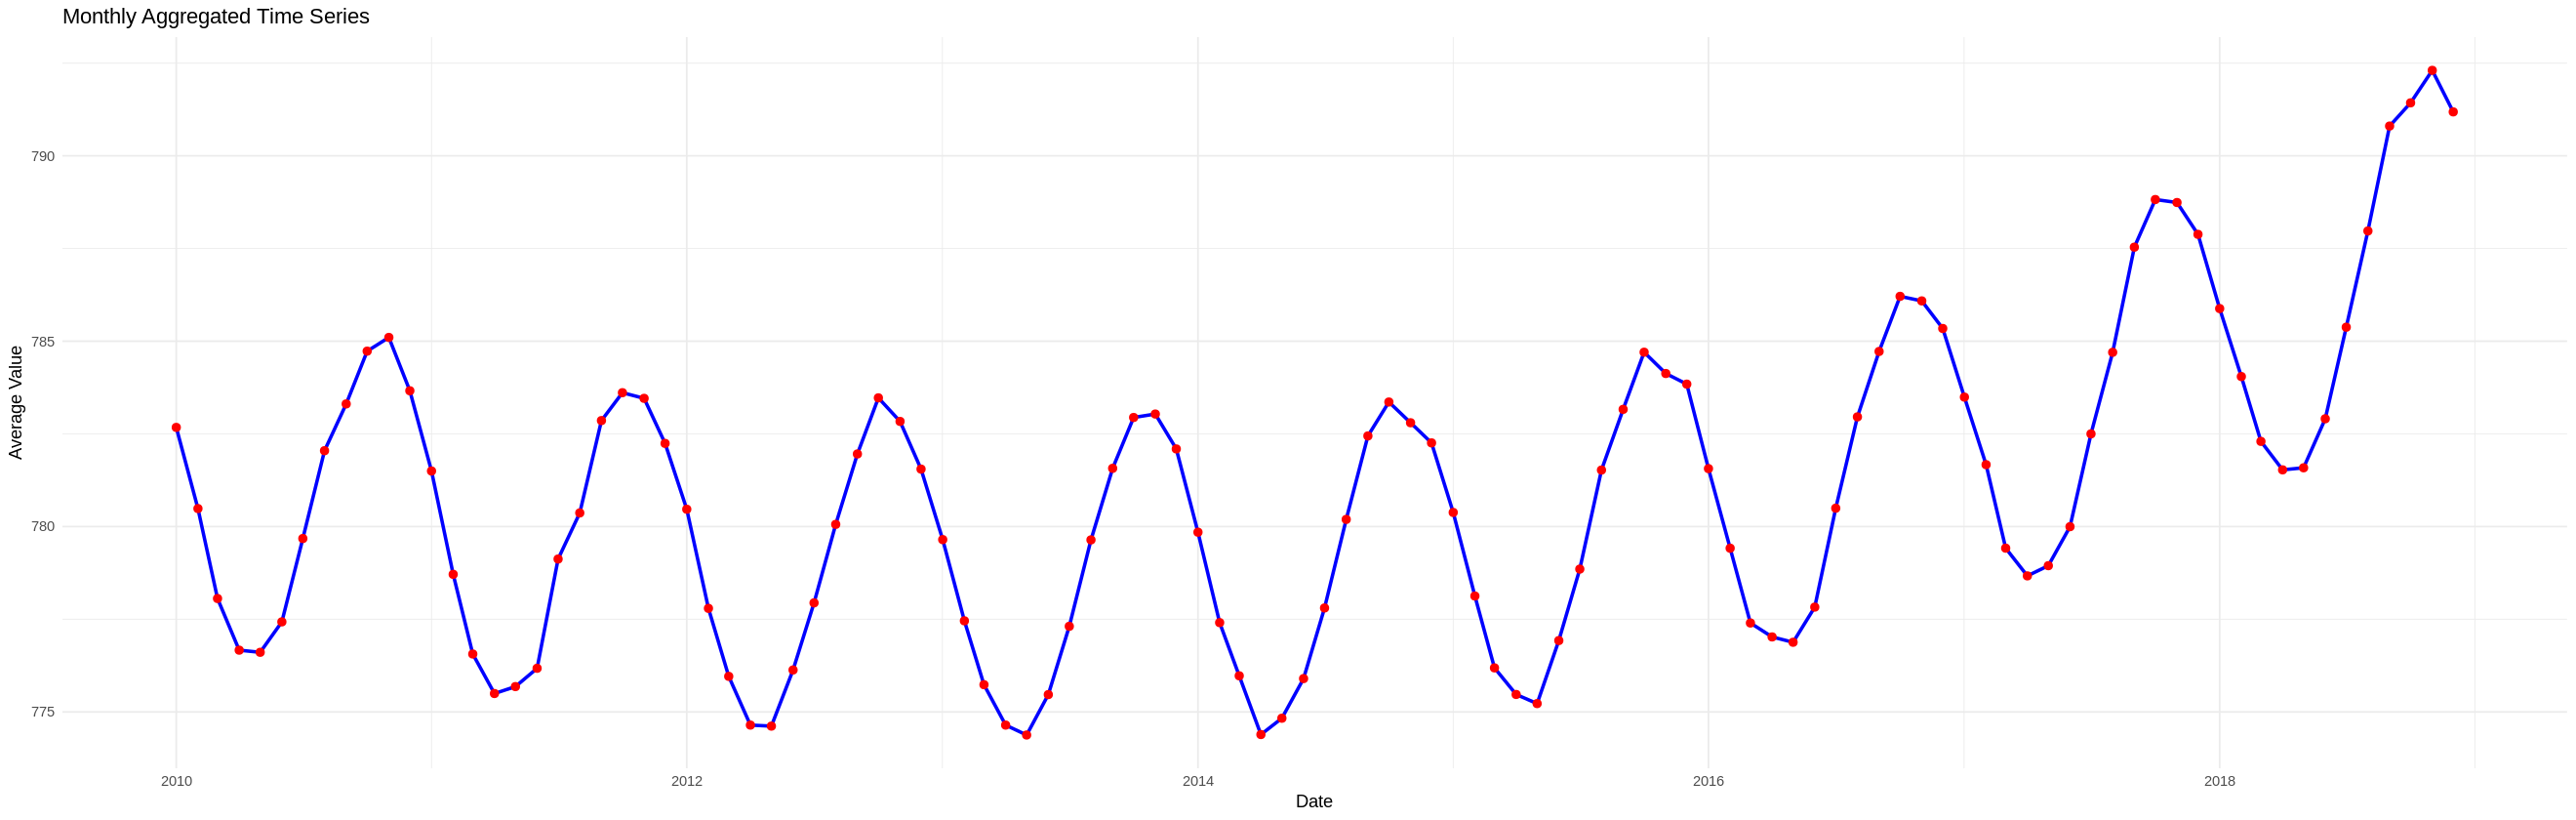

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(lubridate)


# Aggregate by month (taking the mean of 'Value')
data_monthly <- mydata %>%
  mutate(YearMonth = floor_date(Date, "month")) %>%
  group_by(YearMonth) %>%
  summarise(Average_number_sold = mean(number_sold, na.rm = TRUE))

# Plot the monthly trend
ggplot(data_monthly, aes(x=YearMonth, y=Average_number_sold)) +
  geom_line(color="blue", size=1) +         # Line plot
  geom_point(color="red", size=2) +        # Add points for clarity
  labs(title="Monthly Aggregated Time Series",
       x="Date", y="Average Value") +
  theme_minimal()


Aggregating the data by month helps smooth out daily fluctuations and reveals broader trends, such as long-term seasonality and general movement over time. However, monthly aggregation might obscure some important short-term variations, such as weekly sales cycles, special events, or promotions that could influence demand patterns on a smaller time scale.

##Weakly data

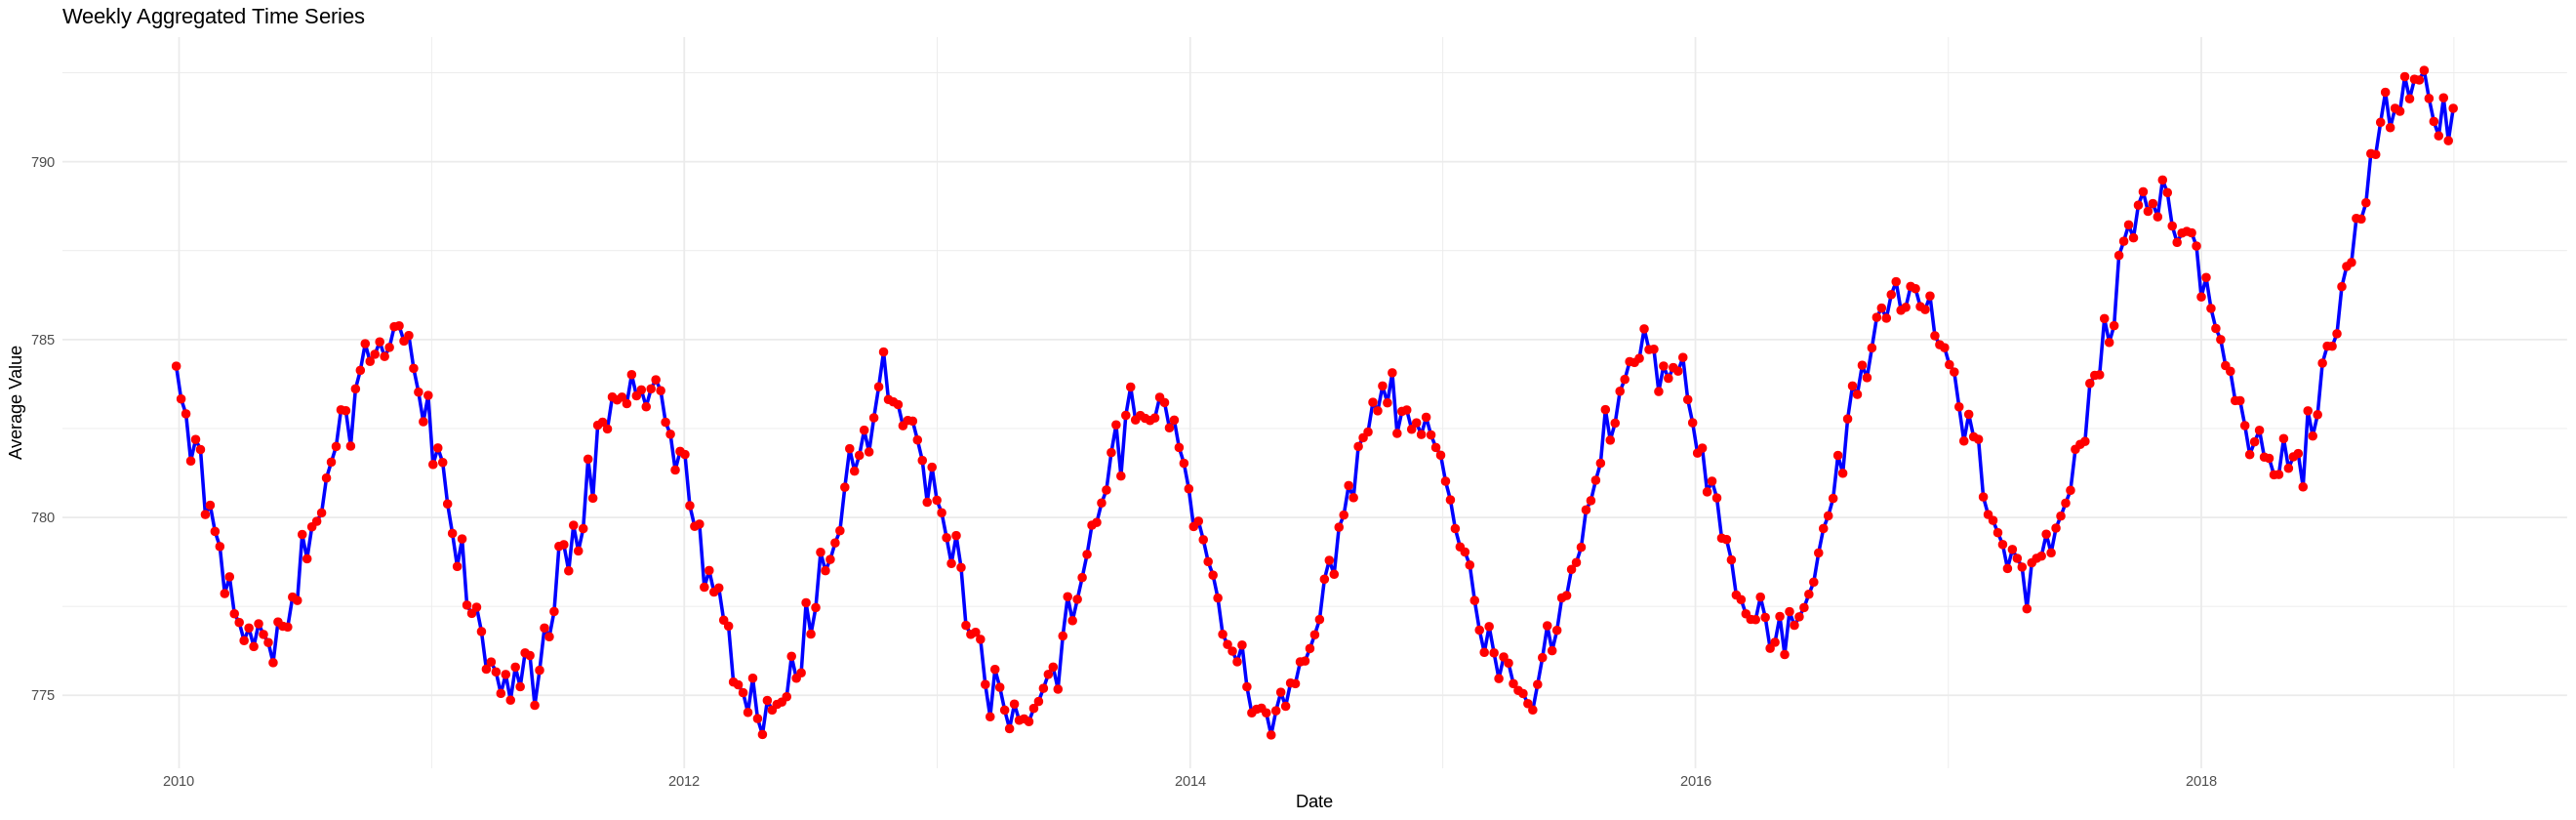

In [ ]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)

# Aggregate by week (taking the mean of 'number_sold')
data_weekly <- mydata %>%
  mutate(YearWeek = floor_date(Date, "week", week_start = 1)) %>%  # Group by week (starting Monday)
  group_by(YearWeek) %>%
  summarise(Average_number_sold = mean(number_sold, na.rm = TRUE))

# Plot the weekly trend
ggplot(data_weekly, aes(x=YearWeek, y=Average_number_sold)) +
  geom_line(color="blue", size=1) +         # Line plot
  geom_point(color="red", size=2) +        # Add points for clarity
  labs(title="Weekly Aggregated Time Series",
       x="Date", y="Average Value") +
  theme_minimal()


Since the dataset is related to product sales, demand patterns often follow a weekly cycle due to factors like weekday vs. weekend shopping behaviors. Aggregating by week allows us to capture these short-term variations while still reducing noise compared to daily data. Additionally, it provides a good balance between granularity and visibility, ensuring that trends, seasonality, and anomalies remain evident without excessive data density.

##General Observations on Seasonality, Trend, and Variance

Trend: Over time, there appears to be a general upward trend in sales, indicating possible growth in demand, increased market reach, or external factors driving sales higher.

Seasonality: The data exhibits clear seasonal patterns, with periodic increases and decreases that could correspond to specific months, holidays, or promotional cycles. This suggests that external factors, such as seasonal demand or consumer behavior, play a role.

Variance: the variance appears relatively stable over time. This suggests that the fluctuations in sales are fairly consistent, without major spikes or irregular dispersions.

##Variance, Variance transformation is needed?


to confirm that we dont need a variance transformation we may plot abox plot for our data through the years and notice the spread of the data

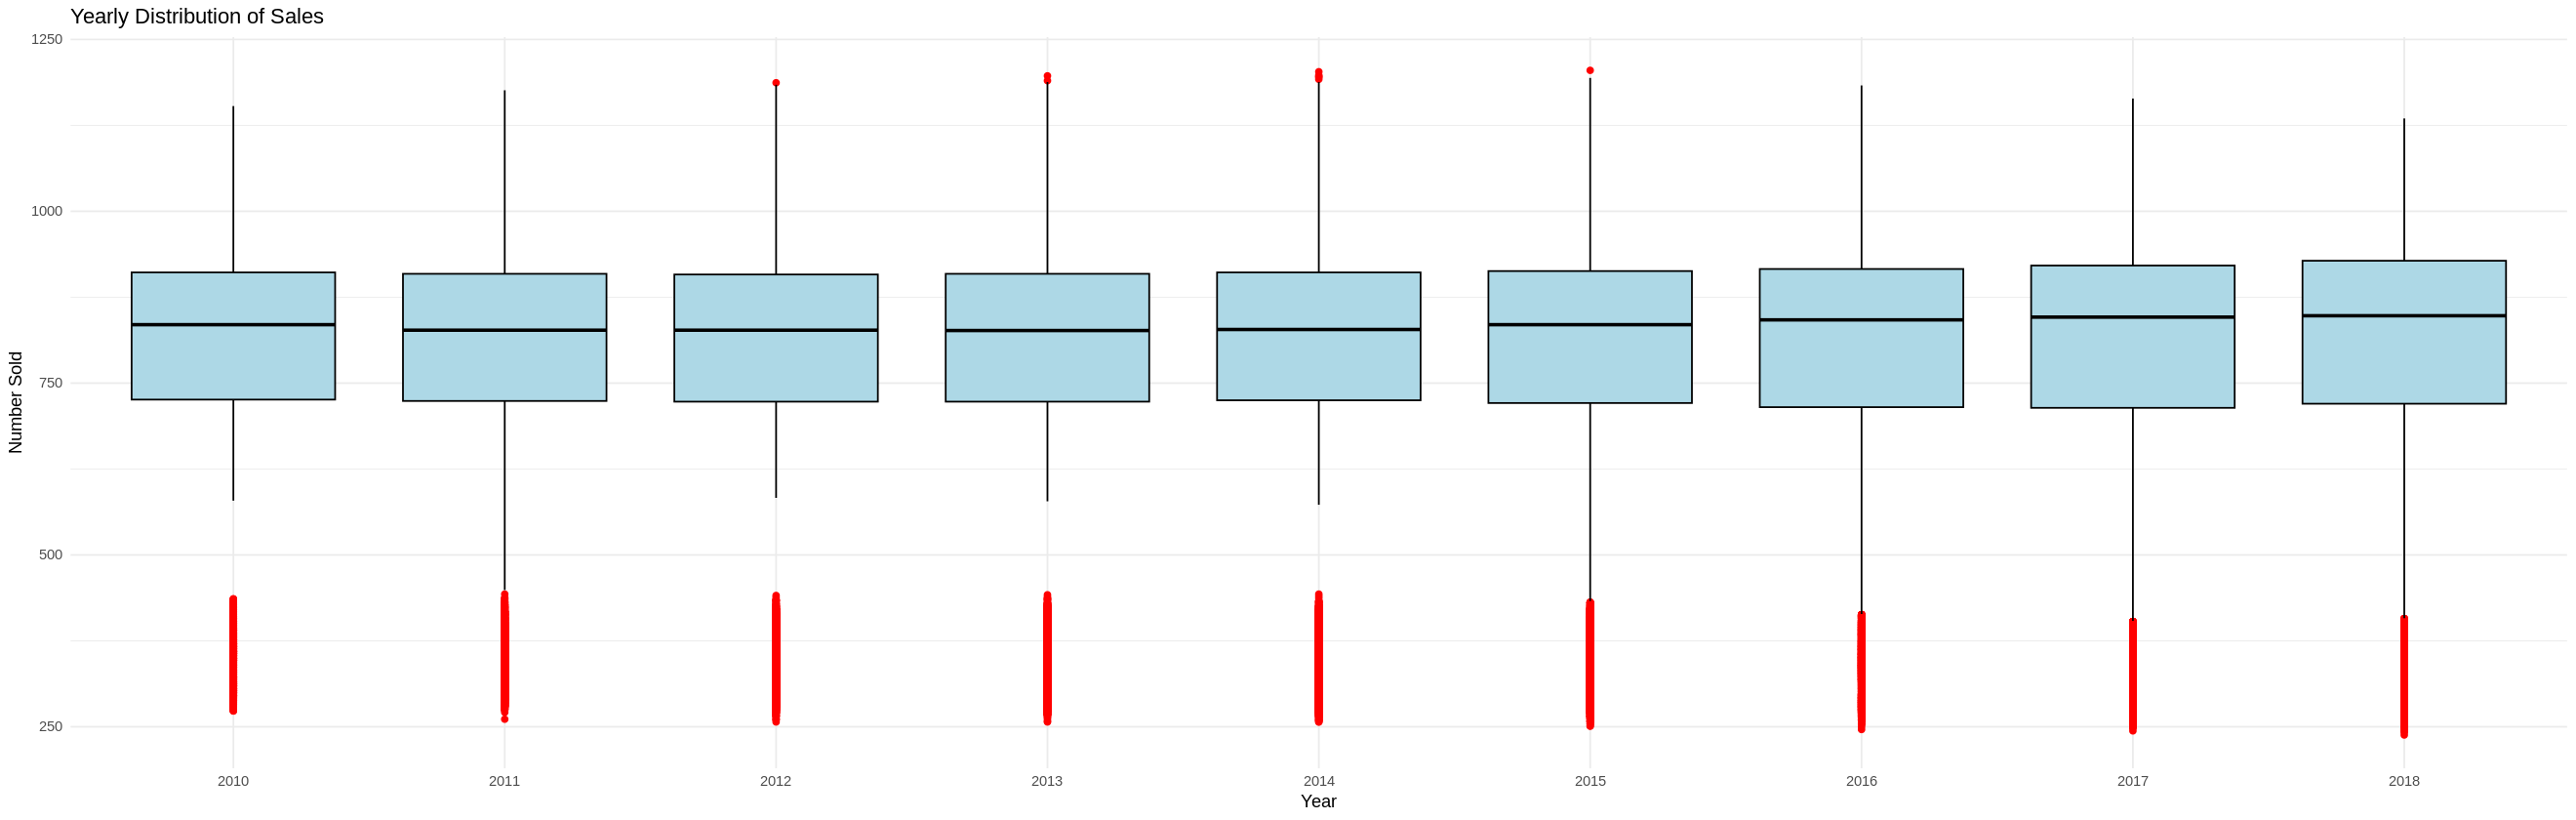

In [ ]:
library(ggplot2)
library(lubridate)
library(dplyr)

# Extract year from date
mydata <- mydata %>%
  mutate(Year = year(Date))

# Create a boxplot
ggplot(mydata, aes(x = as.factor(Year), y = number_sold)) +
  geom_boxplot(fill = "lightblue", color = "black", outlier.color = "red") +
  labs(title = "Yearly Distribution of Sales",
       x = "Year",
       y = "Number Sold") +
  theme_minimal()


No significant increase or decrease in variability – The distribution of sales remains relatively constant, meaning external factors (such as market trends or store performance) are not causing large fluctuations year over year.

Outliers remain consistent – The red dots at the bottom indicate low sales outliers, but they occur at similar levels each year, meaning there are no sudden shifts in sales behavior.

####we conclude that no variance transformation is needed

##Stationarity, deferencing is needed?


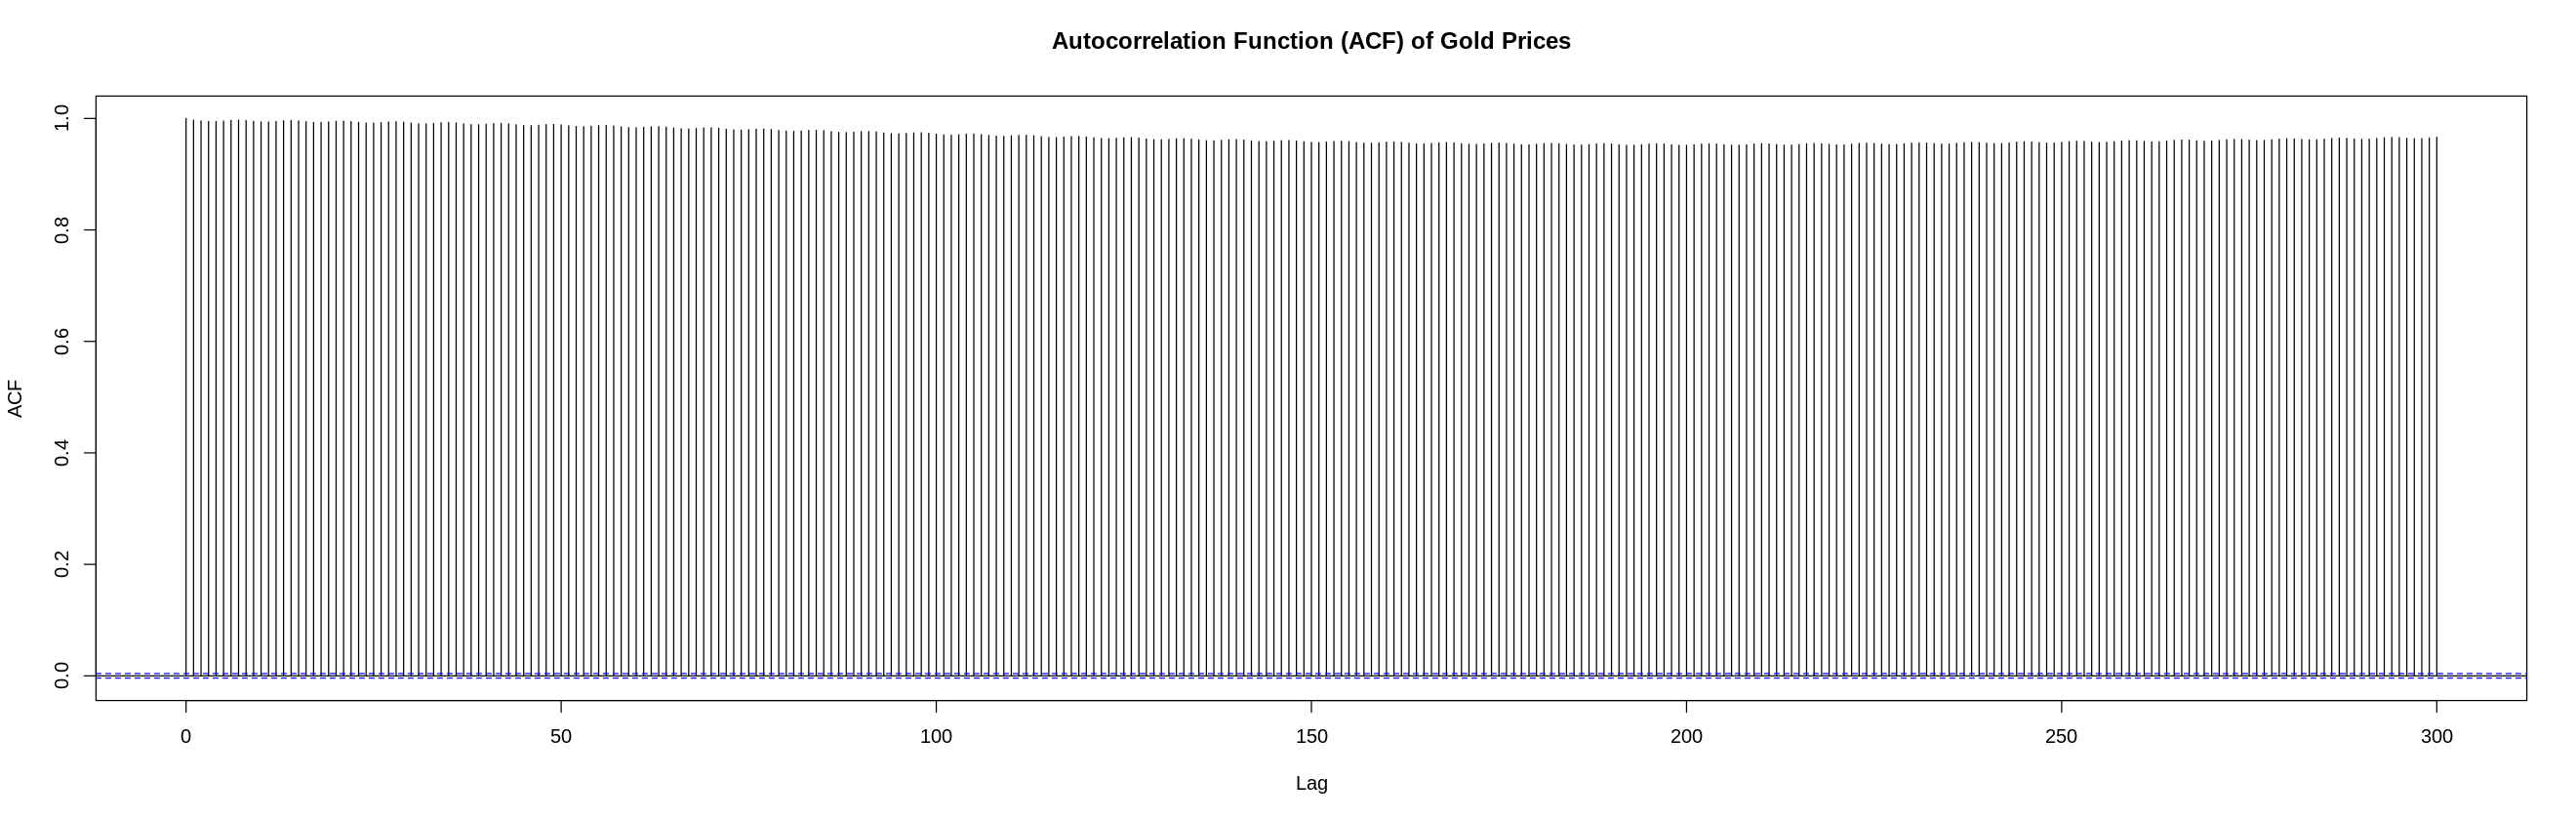

In [ ]:
# Plot the autocorrelation function (ACF)

acf(mydata$number_sold, main = "Autocorrelation Function (ACF) of Gold Prices", lag.max = 300)

To determine whether the time series is stationary, we plotted the **Autocorrelation Function (ACF)**.  
A slow decay in the ACF suggests the presence of **non-stationarity**, indicating a possible trend or seasonality in the data.

#### A diffrencing is needed

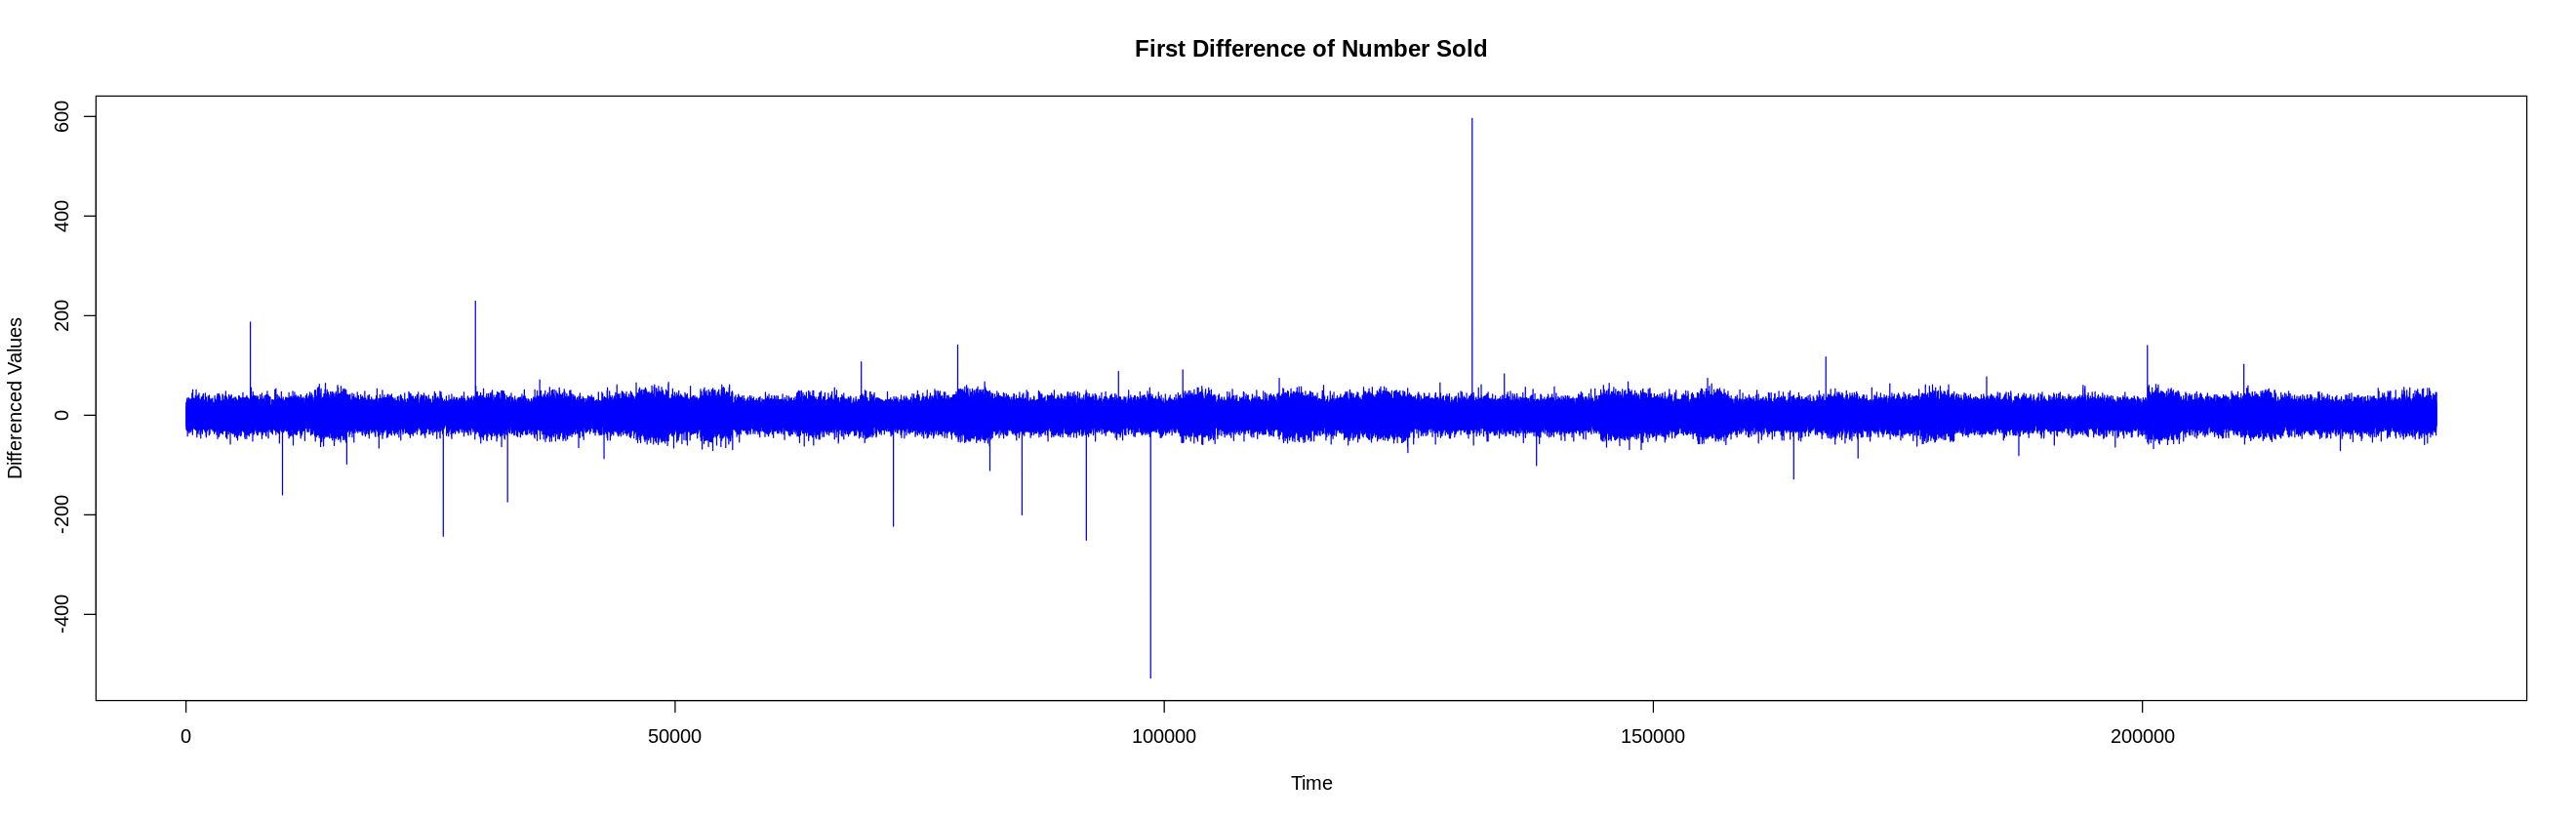

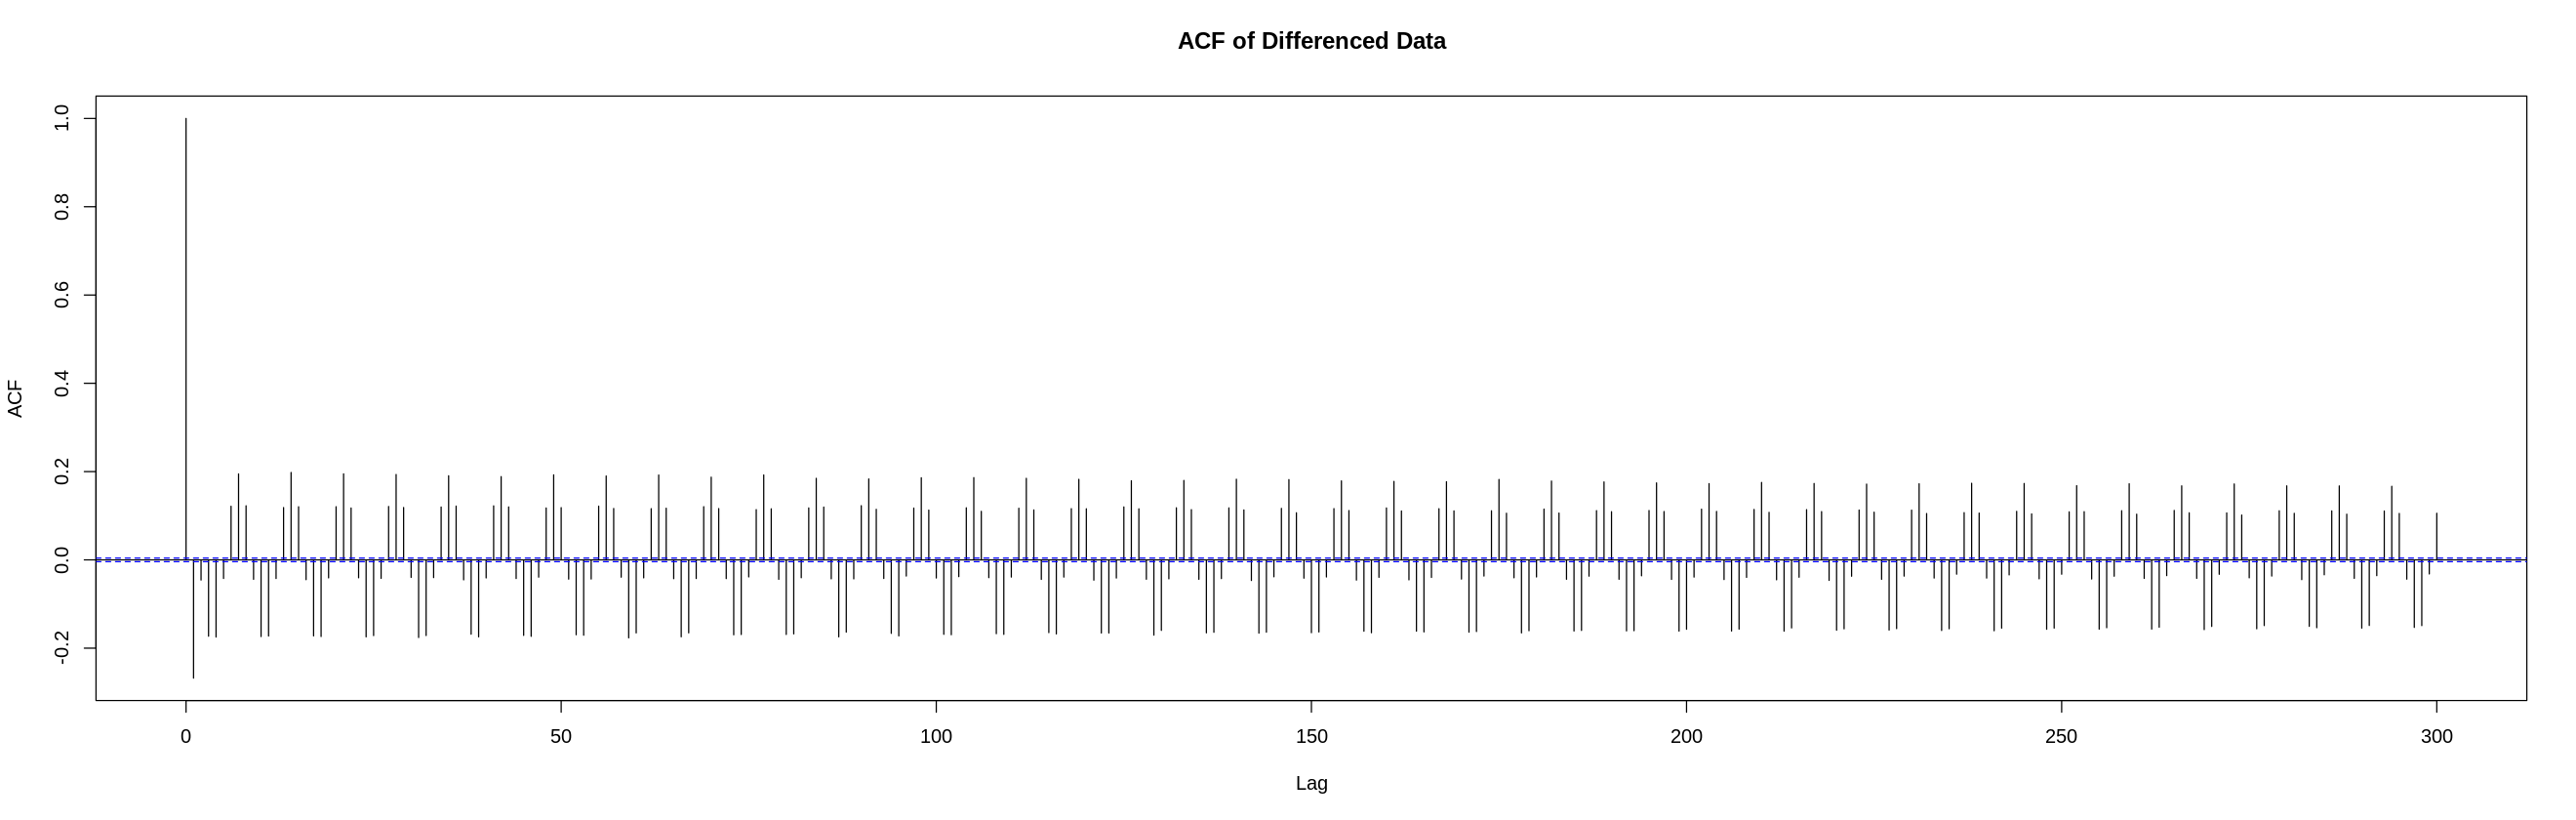

In [ ]:
# Compute first difference
mydata$diff_number_sold <- c(NA, diff(mydata$number_sold))

# Plot the first-differenced data
plot(mydata$diff_number_sold, type = "l", main = "First Difference of Number Sold",
     ylab = "Differenced Values", xlab = "Time", col = "blue")

# Plot the ACF of the first difference
acf(na.omit(mydata$diff_number_sold), main = "ACF of Differenced Data", lag.max = 300)


####First Difference of Number Sold (Top Plot)
This plot shows the first-differenced values of number_sold over time.

Differencing is used to remove trends and make the data stationary.

The plot appears to fluctuate around zero, which is a good sign that the trend has been removed.

 Some large spikes indicate occasional extreme changes in sales.

####The ACF (Autocorrelation Function)
the plot shows how correlated the differenced time series is with its past values at different lags.

The first lag has a high positive correlation (~1), which is expected because differencing removes trend but retains short-term relationships.

The rest of the lags are close to zero, meaning that differencing has successfully removed most of the autocorrelation.

The alternating positive and negative bars might indicate some seasonality or periodic patterns.

####Augmented Dickey-Fuller (ADF) Test for Stationarity


In [ ]:
# Load necessary package
install.packages("tseries")

library(tseries)

# Perform ADF test on differenced data
adf_test <- adf.test(na.omit(mydata$diff_number_sold))

# Print the result
print(adf_test)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in adf.test(na.omit(mydata$diff_number_sold)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  na.omit(mydata$diff_number_sold)
Dickey-Fuller = -45.835, Lag order = 61, p-value = 0.01
alternative hypothesis: stationary




To confirm the stationarity of the dataset after differencing, we performed the Augmented Dickey-Fuller (ADF) test. The results are as follows:  

- **Test Statistic**: -45.835  
- **Lag Order**: 61  
- **p-value**: < 0.01  

Since the p-value is very small (0.01), we reject the null hypothesis, which states that the time series has a unit root (i.e., it is non-stationary). Therefore, we conclude that our differenced data is **stationary**, making it suitable for further time series modeling.  


#Stp 03: Model selection

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



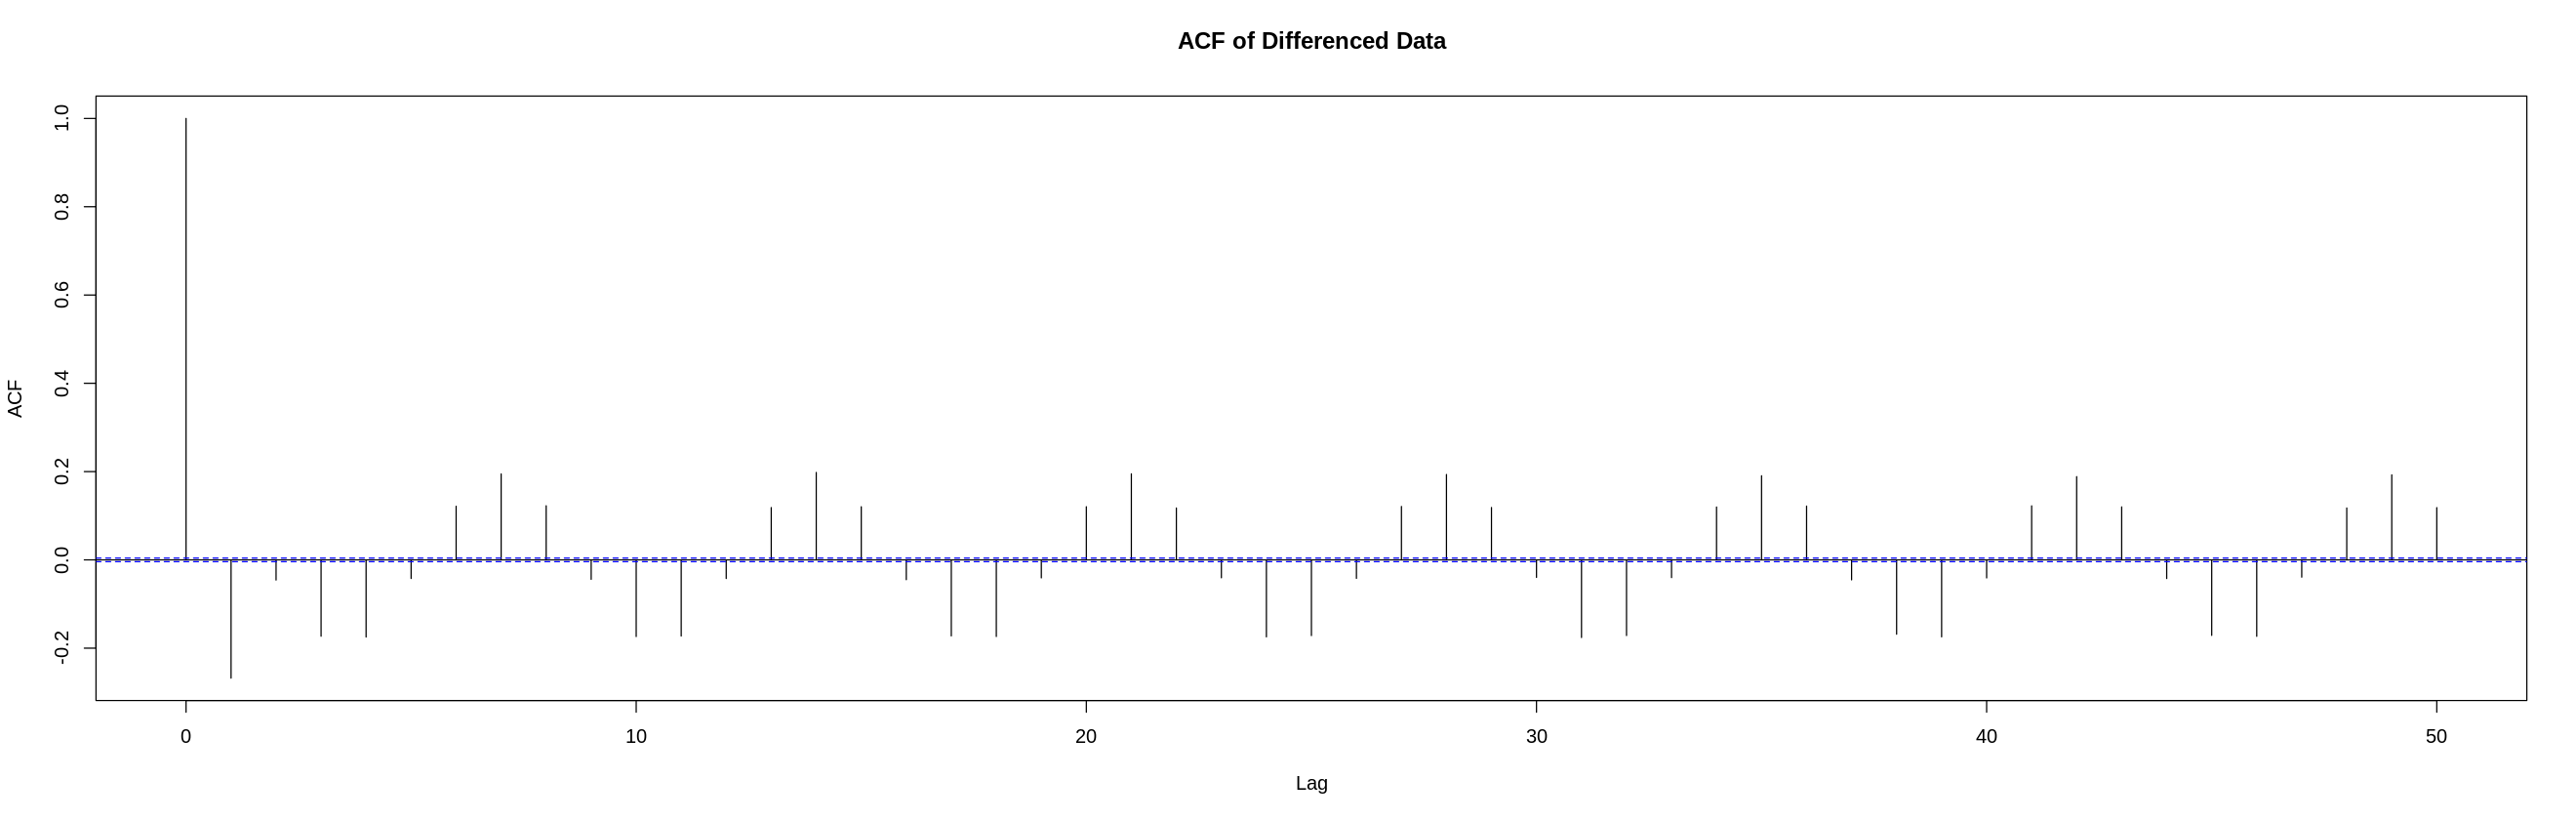

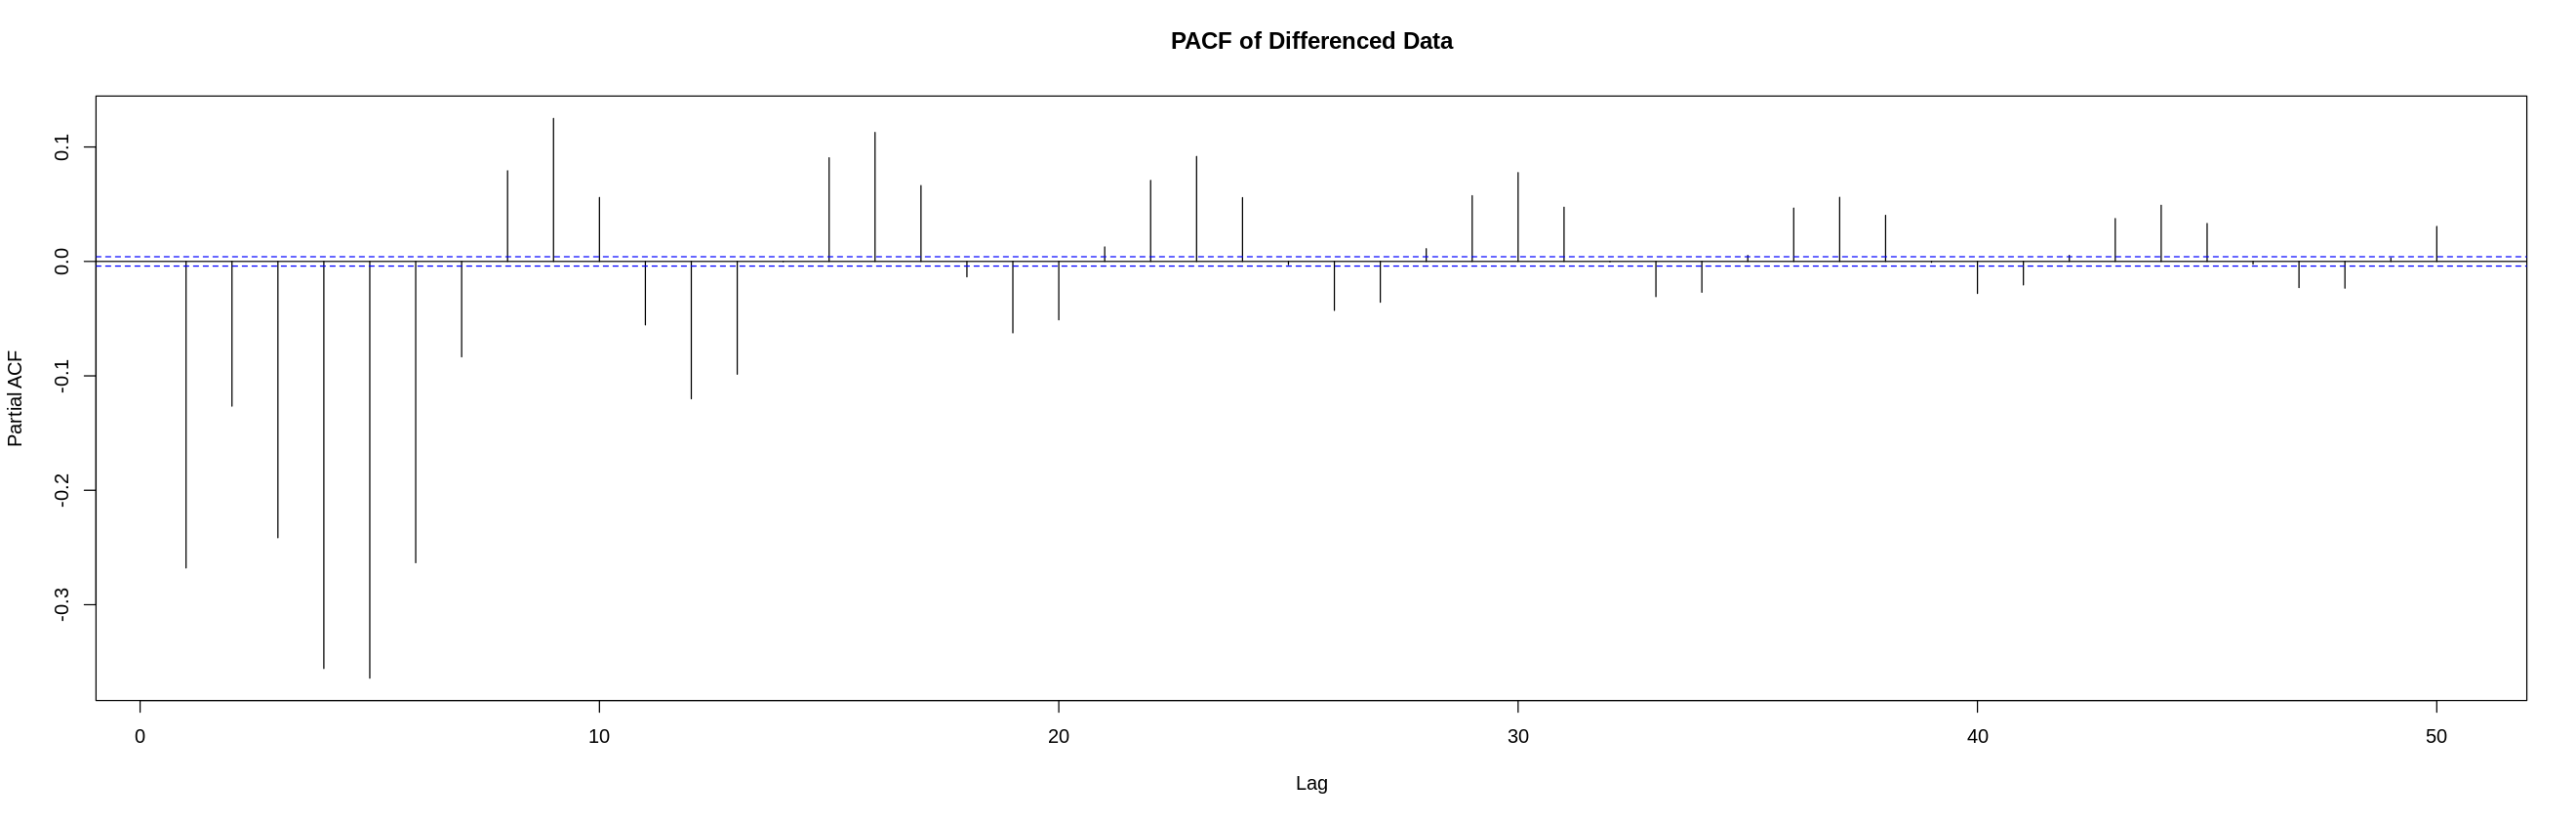

In [ ]:
install.packages("forecast")

library(forecast)

# Plot ACF and PACF for differenced data

acf(na.omit(mydata$diff_number_sold), main = "ACF of Differenced Data", lag.max = 50)
pacf(na.omit(mydata$diff_number_sold), main = "PACF of Differenced Data", lag.max = 50)


##Interpretation of ACF and PACF for Model Identification

## Autocorrelation Function (ACF) Analysis  
- The ACF plot shows significant autocorrelation at **lag 0** (always 1) and **lag 1** (~ -0.3).  
- After lag 1, the autocorrelation quickly drops and oscillates around zero, with some spikes slightly above and below the confidence interval.  
- This suggests a **moving average (MA) process**, as the ACF typically cuts off for MA models.  

## Partial Autocorrelation Function (PACF) Analysis  
- The PACF plot exhibits significant autocorrelations for the first few lags but then gradually **decays over time**.  
- This behavior is characteristic of an **MA(q) process**, as PACF does not cut off but instead decreases slowly.  

## Model Identification  
- Since the **ACF cuts off after lag 1** and the **PACF decays gradually**, this strongly indicates an **MA(1) model**.  
## **Final Model: ARIMA(0,1,1)**
This means:
- The original data was **differenced once** **to** remove non-stationarity.
- The differenced data follows an **MA(1) process**.

In [ ]:
auto.arima(mydata$diff_number_sold)

Series: mydata$diff_number_sold 
ARIMA(3,0,2) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      0.7058  -0.3121  -0.4099  -1.2879  0.6647
s.e.  0.0025   0.0028   0.0026   0.0019  0.0040

sigma^2 = 159.4:  log likelihood = -909919
AIC=1819850   AICc=1819850   BIC=1819912

## **Bayesian Information Criterion (BIC):**
The Bayesian Information Criterion (BIC) is a statistical measure used for model selection among a set of candidate models. It balances the goodness of fit of a model with its complexity, penalizing models with more parameters. The BIC provides a measure of the relative quality of different models by taking into account both the likelihood of the data given the model and the number of parameters in the model. A lower BIC value indicates a better trade-off between model fit and complexity, making it a useful tool for selecting the most appropriate model from a set of competing models.

In [ ]:
install.packages("forecast")

library(forecast)

# Fit models
model1 <- Arima(mydata$diff_number_sold, order = c(0,1,1))
model2 <- Arima(mydata$diff_number_sold, order = c(3,0,2), include.mean = FALSE)

# Get AIC and BIC values
cat("Model 1 (ARIMA(0,1,1)): AIC =", AIC(model1), ", BIC =", BIC(model1), "\n")
cat("Model 2 (ARIMA(3,0,2)): AIC =", AIC(model2), ", BIC =", BIC(model2), "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Model 1 (ARIMA(0,1,1)): AIC = 1927863 , BIC = 1927883 
Model 2 (ARIMA(3,0,2)): AIC = 1819850 , BIC = 1819912 


Since both AIC and BIC are lower for ARIMA(3,0,2), this suggests that it is preferred over ARIMA(0,1,1).





##arima.subsets()

To identify the best ARIMA model, we can also use the `arima.subsets()` function from the `TSA` package. This method evaluates different ARMA(p, q) models by testing various combinations of autoregressive (AR) and moving average (MA) terms.

By using this approach, we systematically explore possible ARMA models before performing full ARIMA fitting and diagnostics.



In [ ]:
# Install and load necessary package
install.packages("TSA")  # Install if not already installed
library(TSA)

# Fit ARMA models with up to 3 AR (p) and 3 MA (q) terms
best_subset <- armasubsets(y = mydata$number_sold, nar =7 , nma = 7, y.name = "Number Sold")

# Plot the results
plot(best_subset)






From the heatmap, we will take the **uppermost row**, which represents the model with the **largest number of included terms** (maximum AR and MA lags) represents an **ARMA(7,7).

This model serves as a reference to compare against simpler models and determine the best fit for our data.


## candidate models


From the results, we will analyze the following models:

- **ARIMA(0,1,1)**
- **ARIMA(3,0,2)**
- **ARIMA(7,1,7)** (selected from the ARIMA subsets approach)

Next, we will perform **diagnostic checks** to evaluate the residuals and ensure the chosen models are appropriate for forecasting.


#Step 04:Fitting and Diagnostics:


##Fitting the models


In [ ]:
# Load required libraries
library(forecast)
library(tseries)

# Assume `data_ts` is your time series
model_011 <- arima(mydata$diff_number_sold, order = c(0,1,1))
model_302 <- arima(mydata$diff_number_sold, order = c(3,0,2))
model_717 <- arima(mydata$diff_number_sold, order = c(7,1,7))


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: Error: object 'mydata' not found


##Plotting the residuals

In [ ]:
par(mfrow = c(3,1)) # Arrange plots in a column

plot(model_011$residuals, main = "Residuals of ARIMA(0,1,1)", col = "blue")
plot(model_302$residuals, main = "Residuals of ARIMA(3,0,2)", col = "red")
plot(model_717$residuals, main = "Residuals of ARIMA(7,1,7)", col = "green")


##ACF and PACF of Residuals

In [ ]:
par(mfrow = c(3,2)) # Two plots per row

acf(model_011$residuals, main = "ACF - ARIMA(0,1,1)")
pacf(model_011$residuals, main = "PACF - ARIMA(0,1,1)")

acf(model_302$residuals, main = "ACF - ARIMA(3,0,2)")
pacf(model_302$residuals, main = "PACF - ARIMA(3,0,2)")

acf(model_717$residuals, main = "ACF - ARIMA(7,1,7)")
pacf(model_717$residuals, main = "PACF - ARIMA(7,1,7)")


##Histogram of Residuals (Normality Check)

In [ ]:
par(mfrow = c(3,1))

hist(model_011$residuals, main = "Histogram - ARIMA(0,1,1)", col = "lightblue", breaks = 20)
hist(model_302$residuals, main = "Histogram - ARIMA(3,0,2)", col = "lightcoral", breaks = 20)
hist(model_717$residuals, main = "Histogram - ARIMA(7,1,7)", col = "lightgreen", breaks = 20)


##QQ Plot of Residuals

In [ ]:
par(mfrow = c(3,1))

qqnorm(model_011$residuals, main = "QQ Plot - ARIMA(0,1,1)")
qqline(model_011$residuals)

qqnorm(model_302$residuals, main = "QQ Plot - ARIMA(3,0,2)")
qqline(model_302$residuals)

qqnorm(model_717$residuals, main = "QQ Plot - ARIMA(7,1,7)")
qqline(model_717$residuals)


##Shapiro-Wilk Normality Test


In [ ]:
shapiro.test(model_011$residuals)
shapiro.test(model_302$residuals)
shapiro.test(model_717$residuals)
